# Fetch one month of data of coronavirus from twitter before it's outbreak and after outbreak and compare peoples emotion

Installing the missed packages

In [1]:
#Intalling the getOldTweet3 pacakge.
#pip install GetOldTweets3
#nltk.download('wordnet')

Importing all necessary packages

In [2]:
import string
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
import GetOldTweets3 as myTweet
import nltk
import warnings
warnings.filterwarnings('ignore')

simple code to understand the translate and maketrans method

In [3]:
my_text = 'Hi! , I am doing great, :) :) How about you... :)'
lower_case=my_text.lower()
cleaned_text = lower_case.translate(str.maketrans('','', string.punctuation))
print(cleaned_text)

hi  i am doing great   how about you 


fetch_Tweets method to get the latest 1000 tweets about covid corona

In [4]:
def fetch_tweets(fromDate,ToDate):
    tweet_Criteria  = myTweet.manager.TweetCriteria().setQuerySearch('#Corona').setSince(fromDate) \
                                                                                .setUntil(ToDate).setMaxTweets(1000)
    tweets = myTweet.manager.TweetManager.getTweets(tweet_Criteria)
    text_tweets = [[tweet.text]for tweet in tweets]
    return text_tweets

# Now Lets Analyze the Emotions After corona OutBreak

In [5]:
tweet_results = fetch_tweets('2020-04-01','2020-04-30')

In [6]:
len(tweet_results)

1000

In [7]:
print(tweet_results)

[['Def. the last thing you need after/while #Corona. I saw the pix from friends in LA and SF. Looks like war in the streets. Stay safe and good luck!'], ['Turn on the news. The agenda for talking about #corona has subsided. The media has shifted its focus. By the end of summer, no one will know what #corona is.... #riots #msm #fakenews #sheeple'], ['#corona #covid19 #newjersey #nj #centraljersey #centralnj #health #eastbrunswick #eb #middlesex #woodbridge #oldbridge #monroe #perthamboy #edison #sayreville #piscataway #northbrunswick #newbrunswick #southplainfield #southbrunswick #carteret #plainsboro #middlesexcounty'], ['Hij vergelijkt het verloop met andere infectieziektes, zoals Q-koorts, de ziekte van Lyme en de ziekte van Pfeiffer, waarbij mensen ook langdurig ziek zijn. Lees meer: https://eenvandaag.avrotros.nl/item/al-lange-tijd-coronaklachten-dat-betekent-niet-dat-de-dokter-je-kan-helpen-we-weten-eigenlijk-nie/ #Lymevereniging #Corona #LangdurigeKlachten'], ['مهم! #كورونا_مصر #

In [8]:
tweet_results[0][0]

'Def. the last thing you need after/while #Corona. I saw the pix from friends in LA and SF. Looks like war in the streets. Stay safe and good luck!'

In [9]:
tweet_results[1][0]

'Turn on the news. The agenda for talking about #corona has subsided. The media has shifted its focus. By the end of summer, no one will know what #corona is.... #riots #msm #fakenews #sheeple'

In [10]:
# clean the punctuations
def clean_Text(tweet_results):
    text = ''
    for i in range (0,len(tweet_results)):
        text = tweet_results[i][0] + " "+ text
    text = text.lower()
    cleaned_text = text.translate(str.maketrans('','',string.punctuation))
    tokenized_words = cleaned_text.split()
    return tokenized_words

In [11]:
tokenized_words = clean_Text(tweet_results)

In [12]:
len(tokenized_words)

23773

In [13]:
print(tokenized_words)

['afdfraktion', 'wird', 'untersuchungsausschuss', 'zum', 'coronakrisenmanagement', 'der', 'bundesregierung', 'beantragen', 'httpswwwafdbundestagdespangenbergafdfraktionwirduntersuchungsausschusszumcoronakrisenmanagementderbundesregierungbeantragen', 'who', 'said', 'kerala', 'isnt', 'part', 'of', 'india', 'its', 'comparative', 'study', 'and', 'the', 'rest', 'of', 'india', 'is', 'nowhere', 'near', 'in', 'fighting', 'corona', 'dont', 'be', 'get', 'upset', 'but', 'be', 'proud', 'of', 'kerala', 'that', 'it', 'is', 'in', 'india', 'btw', 'remember', 'that', 'once', 'the', 'pm', 'narendra', 'modi', 'compared', 'kerala', 'with', 'somalia', 'self', 'quarantine', 'day', 'mumbai', 'mumbaikar', 'india', 'corona', 'coronavirus', 'covid19', 'chill', 'weekend', 'saturday', 'sunday', 'foodie', 'insta', 'instagram', 'photography', 'fridge', 'drinks', 'coldcoffee', 'nescafe', 'self', 'quarantine', 'httpswwwinstagramcompca0oelmajlsigshidvze82k1b8wgh', 'uk', 'is', 'second', 'in', 'world', 'for', 'total', '

In [14]:
stopword = stopwords.words('english')

In [15]:
len(stopword)

179

Cleaning Stopwords

In [16]:
final_words=[]
def Remove_stopwords():
    for word in tokenized_words:
        if word not in stopword:
            final_words.append(word)
    return final_words

In [17]:
final_words = Remove_stopwords()

In [18]:
print('Cleaned_Words',len(final_words))
print('Actual_Words',len(tokenized_words))

Cleaned_Words 20674
Actual_Words 23773


Applying lemma for words

In [19]:
#Lets apply lemma to the words
lemma_words = []
def apply_lemma():
    for word in final_words:
        word = WordNetLemmatizer().lemmatize(word)
        lemma_words.append(word)
    return lemma_words

In [20]:
lemma_words = apply_lemma()
print(lemma_words)

['afdfraktion', 'wird', 'untersuchungsausschuss', 'zum', 'coronakrisenmanagement', 'der', 'bundesregierung', 'beantragen', 'httpswwwafdbundestagdespangenbergafdfraktionwirduntersuchungsausschusszumcoronakrisenmanagementderbundesregierungbeantragen', 'said', 'kerala', 'isnt', 'part', 'india', 'comparative', 'study', 'rest', 'india', 'nowhere', 'near', 'fighting', 'corona', 'dont', 'get', 'upset', 'proud', 'kerala', 'india', 'btw', 'remember', 'pm', 'narendra', 'modi', 'compared', 'kerala', 'somalia', 'self', 'quarantine', 'day', 'mumbai', 'mumbaikar', 'india', 'corona', 'coronavirus', 'covid19', 'chill', 'weekend', 'saturday', 'sunday', 'foodie', 'insta', 'instagram', 'photography', 'fridge', 'drink', 'coldcoffee', 'nescafe', 'self', 'quarantine', 'httpswwwinstagramcompca0oelmajlsigshidvze82k1b8wgh', 'uk', 'second', 'world', 'total', 'coronavirus', 'death', 'third', 'world', 'new', 'death', 'surprise', 'confusion', 'every', 'level', 'wearing', 'mask', 'prevent', 'spread', 'corona', 'pub

With the help of emotion list , we are concluding the emotions

In [21]:
emotion_list = []
def calculate_emotions():
    with open('emotions.txt', 'r') as file:
        for line in file:
            clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
            word, emotion = clear_line.split(':')

            if word in lemma_words:
                emotion_list.append(emotion)


plotting the emotions in graph

In [22]:
calculate_emotions()            
print("People emotions from the text \n", emotion_list, '\n \n')
w = Counter(emotion_list)
print("Count of each emotion \n", w)

People emotions from the text 
 [' attracted', ' bored', ' fearless', ' fearful', ' average', ' sad', ' powerless', ' happy', ' fearful', ' sad', ' focused', ' powerless', ' free', ' happy', ' happy', ' sad', ' happy', ' sad', ' alone', ' lost', ' independent', ' attracted', ' codependent', ' obsessed', ' happy', ' adequate', ' sad', ' fearful', ' independent', ' sad', ' anxious', ' fearful', ' powerless', ' fearful', ' alone', ' average', ' focused', ' adequate', ' happy'] 
 

Count of each emotion 
 Counter({' sad': 6, ' happy': 6, ' fearful': 5, ' powerless': 3, ' attracted': 2, ' average': 2, ' focused': 2, ' alone': 2, ' independent': 2, ' adequate': 2, ' bored': 1, ' fearless': 1, ' free': 1, ' lost': 1, ' codependent': 1, ' obsessed': 1, ' anxious': 1})


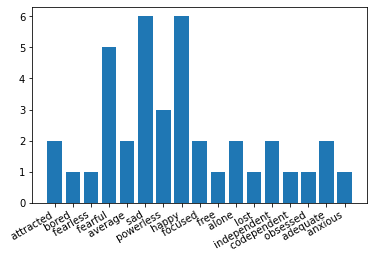

In [23]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.show()

# Now Lets Analyze the Emotions before corona OutBreak

In [34]:
tweet_results = fetch_tweets('2019-10-01','2019-11-30')

In [36]:
tokenized_words = clean_Text(tweet_results)
final_words = Remove_stopwords()
lemma_words = apply_lemma()
#print(lemma_words)
calculate_emotions()            
print("People emotions from the text \n", emotion_list, '\n \n')
w = Counter(emotion_list)
print("Count of each emotion \n", w)

People emotions from the text 
 [' attracted', ' bored', ' fearless', ' fearful', ' average', ' sad', ' powerless', ' happy', ' fearful', ' sad', ' focused', ' powerless', ' free', ' happy', ' happy', ' sad', ' happy', ' sad', ' alone', ' lost', ' independent', ' attracted', ' codependent', ' obsessed', ' happy', ' adequate', ' sad', ' fearful', ' independent', ' sad', ' anxious', ' fearful', ' powerless', ' fearful', ' alone', ' average', ' focused', ' adequate', ' happy', ' attracted', ' sad', ' bored', ' safe', ' adequate', ' fearless', ' fearful', ' average', ' attracted', ' surprise', ' sad', ' powerless', ' sad', ' happy', ' fearful', ' sad', ' focused', ' powerless', ' free', ' happy', ' happy', ' sad', ' entitled', ' happy', ' sad', ' alone', ' lost', ' attached', ' happy', ' independent', ' attracted', ' codependent', ' obsessed', ' happy', ' adequate', ' sad', ' fearful', ' independent', ' sad', ' surprise', ' entitled', ' anxious', ' fearful', ' powerless', ' fearful', ' fea

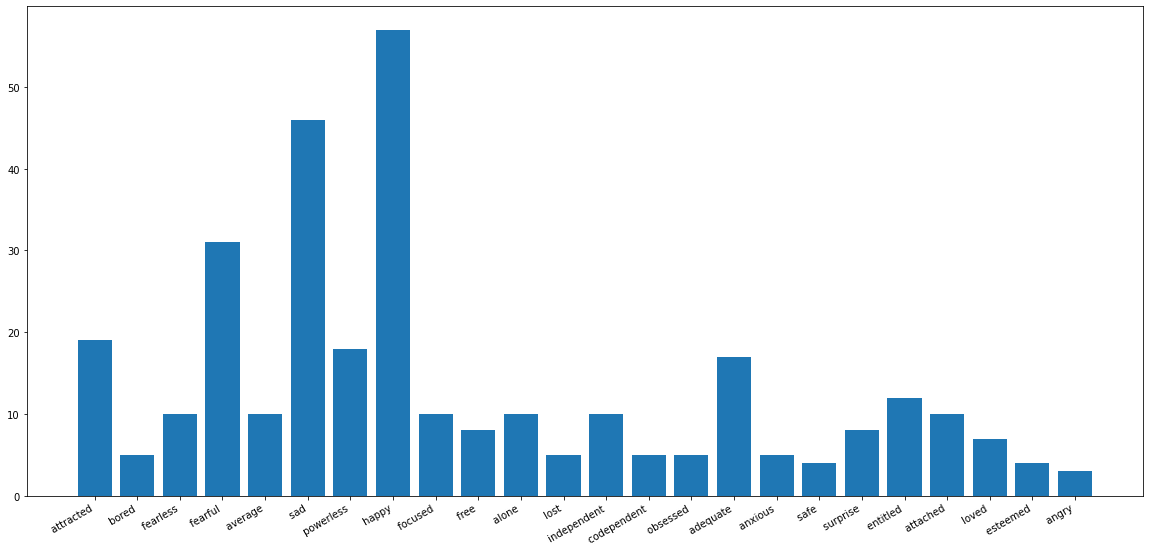

In [37]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.show()